In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

## Ridge, Lasso, ElasticNet

In [2]:
m = 100
## np.random.rand(a,b)  - [a,b] shape array with uniformly distributed random number [0, 1]
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

In [3]:
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X,y)
y_pred = ridge_reg.predict(X)

In [4]:
ridge_reg10 = Ridge(alpha=10)
ridge_reg10.fit(X,y)
y_pred10 = ridge_reg10.predict(X)

In [5]:
ridge_reg100 = Ridge(alpha=100)
ridge_reg100.fit(X,y)
y_pred100 = ridge_reg100.predict(X)

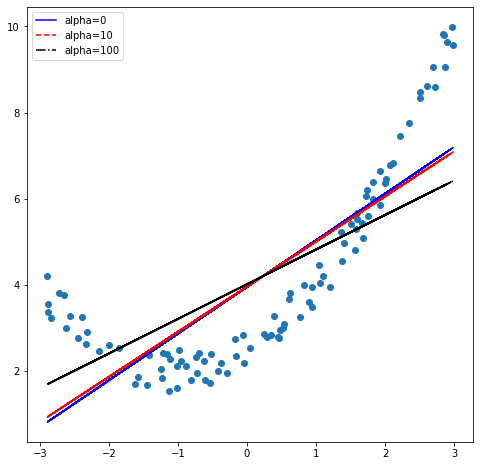

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(X,y)
plt.plot(X, y_pred, 'b-', label='alpha=0')
plt.plot(X, y_pred10, 'r--', label='alpha=10')
plt.plot(X, y_pred100, 'k-.', label='alpha=100')
plt.legend(loc='best')

In [7]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0)
lasso_reg.fit(X,y)
y_pred = lasso_reg.predict(X)

C:\Users\eunbi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98.51941374228578, tolerance: 0.05333013181799561
  positive)


In [8]:
lasso_reg0 = Lasso(alpha=0.1)
lasso_reg0.fit(X,y)
y_pred0 = lasso_reg0.predict(X)

In [9]:
lasso_reg1 = Lasso(alpha=1)
lasso_reg1.fit(X,y)
y_pred1 = lasso_reg1.predict(X)

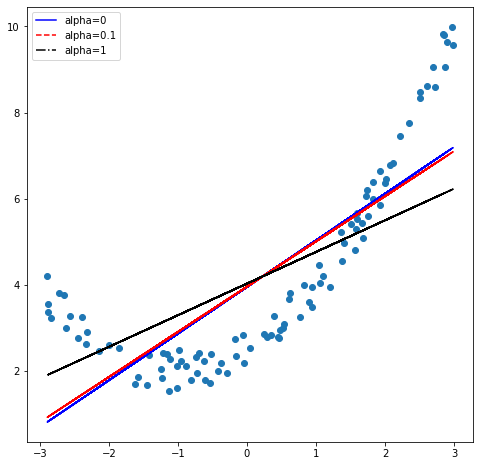

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(X,y)
plt.plot(X, y_pred, 'b-', label='alpha=0')
plt.plot(X, y_pred0, 'r--', label='alpha=0.1')
plt.plot(X, y_pred1, 'k-.', label='alpha=1')
plt.legend(loc='best')

In [11]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=1, l1_ratio = 0.5) # r = l1_ratio
elastic_net.fit(X,y)
y_pred5 = elastic_net.predict(X)

In [12]:
elastic_net8 = ElasticNet(alpha=1, l1_ratio = 0.8) # r = l1_ratio
elastic_net8.fit(X,y)
y_pred8 = elastic_net8.predict(X)

In [13]:
elastic_net2 = ElasticNet(alpha=1, l1_ratio = 0.2) # r = l1_ratio
elastic_net2.fit(X,y)
y_pred2 = elastic_net2.predict(X)

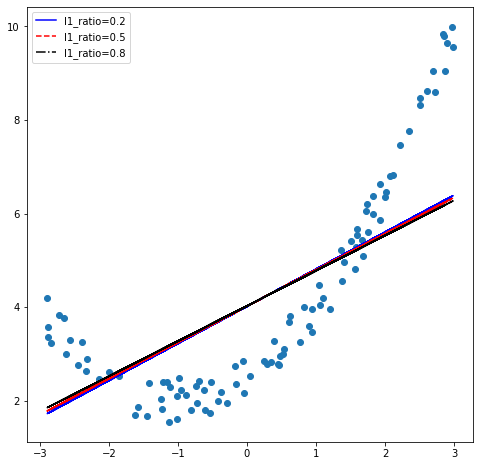

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(X,y)
plt.plot(X, y_pred2, 'b-', label='l1_ratio=0.2')
plt.plot(X, y_pred5, 'r--', label='l1_ratio=0.5')
plt.plot(X, y_pred8, 'k-.', label='l1_ratio=0.8')
plt.legend(loc='best')

## Ridge, Lasso, ElasticNet 활용

In [15]:
movie = pd.read_csv('data/MoviePerformance.csv')
movie2 = movie[movie['ScreenFirst'] > 500]
X = movie2[['ScreenFirst', 'BoxOfficeFirst', 'Rating', 'Users']]
y = movie2['BoxOffice']

In [16]:
# Ridge, Lasso, ElasticNet은 계수값에 민감하게 반응하기 때문에
# 변수들의 범위를 일치시켜줘야한다
# StandardScaler: 평균0 표편1인 표준정규분포

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_s = pd.DataFrame(scaler.fit_transform(X))

In [17]:
X_s.head()

,0,1,2,3
0,-0.147478,-0.582847,0.483597,-0.765291
1,1.506078,2.861824,2.166309,2.290923
2,-2.792664,-0.833807,-2.461150,-0.841740
3,-2.449067,-0.808330,-0.778437,-0.812950
4,-0.367279,-0.643270,0.231190,-0.711982


In [18]:
X_s.describe()

,0,1,2,3
count,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02
mean,-9.798925e-17,7.481938e-17,1.375711e-16,-3.065181e-17
std,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00
min,-2.935408e+00,-8.351933e-01,-2.461150e+00,-8.417399e-01
25%,-3.994910e-01,-5.326264e-01,-6.943017e-01,-5.641845e-01
50%,1.114820e-01,-3.038457e-01,2.311900e-01,-2.459807e-01
75%,6.344556e-01,9.466316e-02,6.518681e-01,2.350029e-01
max,2.061896e+00,6.331059e+00,2.418716e+00,7.451901e+00


In [19]:
X_s.columns = [['ScreenFirst', 'BoxOfficeFirst', 'Rating', 'Users']]

In [20]:
X_train = X_s.iloc[0:80]
y_train = y.iloc[0:80]

X_test = X_s.iloc[80:]
y_test = y.iloc[80:]

In [21]:
# rigde 예측
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train,y_train)
y_ridge = ridge_reg.predict(X_test)

In [22]:
# lasso 예측
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train,y_train)
y_lasso = lasso_reg.predict(X_test)

In [23]:
# elastic net 예측
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_net.fit(X_train,y_train)
y_elastic = elastic_net.predict(X_test)

In [24]:
# 일반 회귀 예측
reg = Lasso(alpha=0)
reg.fit(X_train,y_train)
y_reg = reg.predict(X_test)

C:\Users\eunbi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.53122534530629e+17, tolerance: 85963482174230.17
  positive)


In [25]:
ridge_reg.coef_

array([29485450.54751231, 39142853.8823058 ,  3806846.01811342,
       23421898.91400737])

In [26]:
lasso_reg.coef_

array([31400348.72984944, 42789456.53299639,  1545171.00631707,
       25025400.56141474])

In [27]:
elastic_net.coef_

array([24838487.39221514, 31620570.38535925,  6814948.54640012,
       20341666.64027976])

In [28]:
reg.coef_

array([31400349.26934186, 42789456.98139432,  1545171.44716262,
       25025400.76038251])

In [29]:
## pip install regressors (anaconda prompt)

from regressors import stats 

stats.summary(ridge_reg, X_train, y_train)

Residuals:
          Min            1Q        Median            3Q           Max
-2.231827e+08 -2.259939e+07  2.316861e+07  3.756386e+07  1.207955e+08


Coefficients:
                Estimate    Std. Error  t value   p value
_intercept  1.015432e+08  6.971817e+06  14.5648  0.000000
x1          2.948545e+07  6.903975e+06   4.2708  0.000054
x2          3.914285e+07  7.004979e+06   5.5879  0.000000
x3          3.806846e+06  7.725200e+06   0.4928  0.623533
x4          2.342190e+07  8.214248e+06   2.8514  0.005552
---
R-squared:  0.64110,    Adjusted R-squared:  0.62195
F-statistic: 33.49 on 4 features


In [30]:
stats.summary(lasso_reg, X_train, y_train)

Residuals:
          Min            1Q        Median            3Q           Max
-2.197450e+08 -2.589370e+07  2.213739e+07  3.821500e+07  1.366011e+08


Coefficients:
                Estimate    Std. Error  t value   p value
_intercept  1.011470e+08  6.945992e+06  14.5619  0.000000
x1          3.140035e+07  6.878402e+06   4.5651  0.000018
x2          4.278946e+07  6.979030e+06   6.1311  0.000000
x3          1.545171e+06  7.696584e+06   0.2008  0.841402
x4          2.502540e+07  8.183820e+06   3.0579  0.003042
---
R-squared:  0.64375,    Adjusted R-squared:  0.62475
F-statistic: 33.88 on 4 features


In [31]:
stats.summary(elastic_net, X_train, y_train)

Residuals:
          Min            1Q        Median            3Q           Max
-2.318716e+08 -1.637229e+07  2.525922e+07  4.042606e+07  8.802003e+07


Coefficients:
                Estimate    Std. Error  t value   p value
_intercept  1.022835e+08  7.202329e+06  14.2014  0.000000
x1          2.483849e+07  7.132244e+06   3.4826  0.000813
x2          3.162057e+07  7.236587e+06   4.3695  0.000037
x3          6.814949e+06  7.980621e+06   0.8539  0.395722
x4          2.034167e+07  8.485839e+06   2.3971  0.018886
---
R-squared:  0.61697,    Adjusted R-squared:  0.59654
F-statistic: 30.20 on 4 features


In [32]:
stats.summary(reg, X_train, y_train)

Residuals:
          Min            1Q        Median            3Q           Max
-2.197450e+08 -2.589370e+07  2.213739e+07  3.821500e+07  1.366011e+08


Coefficients:
                Estimate    Std. Error  t value   p value
_intercept  1.011470e+08  6.945992e+06  14.5619  0.000000
x1          3.140035e+07  6.878402e+06   4.5651  0.000018
x2          4.278946e+07  6.979030e+06   6.1311  0.000000
x3          1.545171e+06  7.696584e+06   0.2008  0.841402
x4          2.502540e+07  8.183820e+06   3.0579  0.003042
---
R-squared:  0.64375,    Adjusted R-squared:  0.62475
F-statistic: 33.88 on 4 features


In [33]:
from sklearn.metrics import mean_squared_error
import math

rmse_ridge = math.sqrt(mean_squared_error(y_ridge, y_test))
rmse_lasso = math.sqrt(mean_squared_error(y_lasso, y_test))
rmse_elastic = math.sqrt(mean_squared_error(y_elastic, y_test))
rmse_reg = math.sqrt(mean_squared_error(y_reg, y_test))

In [34]:
print('Ridge : ', rmse_ridge)
print('Lasso : ', rmse_lasso)
print('ElasticNet : ', rmse_elastic)
print('Reg : ', rmse_reg)

Ridge :  58401596.361686915
Lasso :  57342220.933921635
ElasticNet :  61677918.6130894
Reg :  57342220.81328352


## 하이퍼 파라미터 튜닝  

### 그리드 탐색

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'alpha': [0.1, 0.5, 1, 1.5, 2], 'l1_ratio': [0, 0.25, 0.5, 0.75, 1]}
]

elastic_net = ElasticNet()

grid_search = GridSearchCV(
    elastic_net, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    return_train_score=True)

grid_search.fit(X_train,y_train)

C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4734360018440694e+17, tolerance: 65979025324059.73
  positive)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.212329957880036e+17, tolerance: 66625021275932.83
  positive)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.266068466683944e+17, tolerance: 65492169764836.445
  positive)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.5, 1, 1.5, 2],
                          'l1_ratio': [0, 0.25, 0.5, 0.75, 1]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
grid_search.best_params_

{'alpha': 0.5, 'l1_ratio': 0.25}

In [37]:
grid_search.best_estimator_

ElasticNet(alpha=0.5, l1_ratio=0.25)

In [38]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

75875150.52401404 {'alpha': 0.1, 'l1_ratio': 0}
78245410.63053808 {'alpha': 0.1, 'l1_ratio': 0.25}
81526070.50008902 {'alpha': 0.1, 'l1_ratio': 0.5}
86203862.44922133 {'alpha': 0.1, 'l1_ratio': 0.75}
93174999.5212281 {'alpha': 0.1, 'l1_ratio': 1}
69917500.85620822 {'alpha': 0.5, 'l1_ratio': 0}
69480943.23649763 {'alpha': 0.5, 'l1_ratio': 0.25}
70159797.53060056 {'alpha': 0.5, 'l1_ratio': 0.5}
74128234.2308715 {'alpha': 0.5, 'l1_ratio': 0.75}
93174997.94033201 {'alpha': 0.5, 'l1_ratio': 1}
74186846.97608323 {'alpha': 1, 'l1_ratio': 0}
71878629.2161038 {'alpha': 1, 'l1_ratio': 0.25}
69917501.00046998 {'alpha': 1, 'l1_ratio': 0.5}
70159797.49418452 {'alpha': 1, 'l1_ratio': 0.75}
93174995.79939546 {'alpha': 1, 'l1_ratio': 1}
78554663.15483046 {'alpha': 1.5, 'l1_ratio': 0}
75332434.02062431 {'alpha': 1.5, 'l1_ratio': 0.25}
71878629.42822081 {'alpha': 1.5, 'l1_ratio': 0.5}
69480943.39347179 {'alpha': 1.5, 'l1_ratio': 0.75}
93174994.10654104 {'alpha': 1.5, 'l1_ratio': 1}
82252689.28850769 {'a

- 2차 탐색
- 찾아진 조합의 주변으로 값을 좁혀 더 적합한 조합이 있는지 찾아볼 수 있음

In [39]:
param_grid = [
    {'alpha': [0.45, 0.475, 0.5, 0.525, 0.55], 'l1_ratio': [0.15, 0.20, 0.25, 0.30, 0.35]}
]

elastic_net = ElasticNet()

grid_search = GridSearchCV(
    elastic_net, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    return_train_score=True)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.45, 0.475, 0.5, 0.525, 0.55],
                          'l1_ratio': [0.15, 0.2, 0.25, 0.3, 0.35]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
grid_search.best_params_

{'alpha': 0.525, 'l1_ratio': 0.3}

In [41]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

69485782.5163839 {'alpha': 0.45, 'l1_ratio': 0.15}
69482529.27164094 {'alpha': 0.45, 'l1_ratio': 0.2}
69516503.45648749 {'alpha': 0.45, 'l1_ratio': 0.25}
69594798.8669475 {'alpha': 0.45, 'l1_ratio': 0.3}
69726162.12542254 {'alpha': 0.45, 'l1_ratio': 0.35}
69517793.43722883 {'alpha': 0.475, 'l1_ratio': 0.15}
69483772.77448756 {'alpha': 0.475, 'l1_ratio': 0.2}
69485432.47059977 {'alpha': 0.475, 'l1_ratio': 0.25}
69529793.05807005 {'alpha': 0.475, 'l1_ratio': 0.3}
69625544.4832385 {'alpha': 0.475, 'l1_ratio': 0.35}
69573772.98909748 {'alpha': 0.5, 'l1_ratio': 0.15}
69510296.57419078 {'alpha': 0.5, 'l1_ratio': 0.2}
69480943.23649763 {'alpha': 0.5, 'l1_ratio': 0.25}
69492644.67212062 {'alpha': 0.5, 'l1_ratio': 0.3}
69554012.52354445 {'alpha': 0.5, 'l1_ratio': 0.35}
69650320.80688041 {'alpha': 0.525, 'l1_ratio': 0.15}
69558634.38507545 {'alpha': 0.525, 'l1_ratio': 0.2}
69499513.17940043 {'alpha': 0.525, 'l1_ratio': 0.25}
69479787.53588502 {'alpha': 0.525, 'l1_ratio': 0.3}
69507973.05082896 {

### 랜덤 탐색

In [42]:
from sklearn.model_selection import RandomizedSearchCV

elastic_net = ElasticNet()

param_list =  {'alpha': [0.1, 0.5, 1, 1.5, 2], 'l1_ratio': [0, 0.25, 0.5, 0.75, 1]}

rand_search = RandomizedSearchCV(
    elastic_net, 
    param_distributions = param_list, 
    cv=5, 
    n_iter=10,   # 10번 무작위 수행
    scoring='neg_mean_squared_error',
    return_train_score=True)

rand_search.fit(X_train,y_train)

C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.774986037082084e+17, tolerance: 65979025324059.73
  positive)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5963905389776374e+17, tolerance: 66625021275932.83
  positive)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.849982989569047e+17, tolerance: 81127356238717.58
  positive)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

RandomizedSearchCV(cv=5, estimator=ElasticNet(),
                   param_distributions={'alpha': [0.1, 0.5, 1, 1.5, 2],
                                        'l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [43]:
rand_search.best_params_

{'l1_ratio': 0, 'alpha': 0.5}

In [44]:
rand_search.best_estimator_

ElasticNet(alpha=0.5, l1_ratio=0)

In [45]:
cvres = rand_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

86203862.44922133 {'l1_ratio': 0.75, 'alpha': 0.1}
93174997.94033201 {'l1_ratio': 1, 'alpha': 0.5}
78245410.63053808 {'l1_ratio': 0.25, 'alpha': 0.1}
93174999.5212281 {'l1_ratio': 1, 'alpha': 0.1}
78554663.40366742 {'l1_ratio': 0.25, 'alpha': 2}
93174995.79939546 {'l1_ratio': 1, 'alpha': 1}
69917501.00046998 {'l1_ratio': 0.5, 'alpha': 1}
75332434.02062431 {'l1_ratio': 0.25, 'alpha': 1.5}
69917500.85620822 {'l1_ratio': 0, 'alpha': 0.5}
82252689.28850769 {'l1_ratio': 0, 'alpha': 2}


- param_list 값을 연속형으로 

In [46]:
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

# l1_ratio는 0과 1사이의 균등분포를 따르고
# alpha는 0.0001부터 1사이의 로그균등분포를 따른다고 지정
param_dist = {'l1_ratio': stats.uniform(0, 1),
              'alpha': loguniform(1e-4, 1e0)}

elastic_net = ElasticNet()

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(elastic_net, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring='neg_mean_squared_error',
                                   return_train_score=True
                                  )

random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=ElasticNet(), n_iter=20,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F397D17C48>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F397CD2448>},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
random_search.best_params_

{'alpha': 0.9986301557472953, 'l1_ratio': 0.6030496424921961}

In [48]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

88690958.95120126 {'alpha': 0.04861058959295902, 'l1_ratio': 0.6950370806841583}
86897102.70171458 {'alpha': 0.04060565568770971, 'l1_ratio': 0.4584233703632071}
93167411.7223675 {'alpha': 0.0006789651380465008, 'l1_ratio': 0.9675240601207041}
92672115.3404441 {'alpha': 0.0060363214043891705, 'l1_ratio': 0.7546610532442699}
73784416.61304116 {'alpha': 0.19349671901454196, 'l1_ratio': 0.3233753804452164}
93169773.47247642 {'alpha': 0.00026640220766687166, 'l1_ratio': 0.9429952186805619}
87446480.48731954 {'alpha': 0.1417393099534179, 'l1_ratio': 0.8609724035225161}
80496670.09295939 {'alpha': 0.058944283588709484, 'l1_ratio': 0.03346332691176279}
85059812.35544923 {'alpha': 0.04597398132450675, 'l1_ratio': 0.3409203817291315}
69503830.71840985 {'alpha': 0.9986301557472953, 'l1_ratio': 0.6030496424921961}
92986304.15652977 {'alpha': 0.0007393228332332637, 'l1_ratio': 0.2547363037322622}
92275505.55808625 {'alpha': 0.008938620162791516, 'l1_ratio': 0.7004237227460876}
91483097.15793948 {'

### 하이퍼 파라미터 튜닝

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

boston = pd.read_csv('data/boston.csv')

X = boston[['zn', 'chas', 'dis', 'rad', 'black', 'lstat']]
y = boston['medv']

scaler = StandardScaler()
X_s = pd.DataFrame(scaler.fit_transform(X))
X_s.columns = [['zn', 'chas', 'dis', 'rad', 'black', 'lstat']]

X_train,X_test,y_train,y_test=train_test_split(X_s, y, test_size=0.2) 

### Ridge 

In [71]:
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

param_dist = {'alpha': loguniform(1e-4, 1e4)}

ridge_reg = Ridge()

n_iter_search = 50
random_search = RandomizedSearchCV(ridge_reg, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring='neg_mean_squared_error',
                                   return_train_score=True
                                  )

random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Ridge(), n_iter=50,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F397C59608>},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [72]:
random_search.best_params_

{'alpha': 19.696330198375122}

In [73]:
ridge_reg = Ridge(alpha=random_search.best_params_['alpha'])
ridge_reg.fit(X_train,y_train)
y_ridge = ridge_reg.predict(X_test)

### Lasso

In [68]:
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

param_dist = {'alpha': loguniform(1e-4, 1e0)}

lasso_reg = Lasso()

n_iter_search = 50
random_search = RandomizedSearchCV(lasso_reg, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring='neg_mean_squared_error',
                                   return_train_score=True
                                  )

random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Lasso(), n_iter=50,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F3976D7548>},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [69]:
random_search.best_params_

{'alpha': 0.0014166597440978287}

In [70]:
lasso_reg = Lasso(alpha=random_search.best_params_['alpha'])
lasso_reg.fit(X_train,y_train)
y_lasso = lasso_reg.predict(X_test)

### Elastic Net

In [56]:
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

param_dist = {'l1_ratio': stats.uniform(0, 1),
              'alpha': loguniform(1e-4, 1e0)}

elastic_net = ElasticNet()

n_iter_search = 50
random_search = RandomizedSearchCV(elastic_net, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring='neg_mean_squared_error',
                                   return_train_score=True
                                  )

random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=ElasticNet(), n_iter=50,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F397705EC8>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F397CF1DC8>},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
random_search.best_params_

{'alpha': 0.02464600761769429, 'l1_ratio': 0.01691414947939185}

In [58]:
elastic_net = ElasticNet(alpha=random_search.best_params_['alpha'],l1_ratio=random_search.best_params_['l1_ratio'])
elastic_net.fit(X_train,y_train)
y_elastic = elastic_net.predict(X_test)

### 선형 회귀

In [59]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_reg = lin_reg.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error
import math

rmse_ridge = math.sqrt(mean_squared_error(y_ridge, y_test))
rmse_lasso = math.sqrt(mean_squared_error(y_lasso, y_test))
rmse_elastic = math.sqrt(mean_squared_error(y_elastic, y_test))
rmse_reg = math.sqrt(mean_squared_error(y_reg, y_test))

In [79]:
print('Ridge : ', rmse_ridge)
print('Lasso : ', rmse_lasso)
print('ElasticNet : ', rmse_elastic)
print('Reg : ', rmse_reg)

Ridge :  6.192772029024885
Lasso :  6.164183249314486
ElasticNet :  6.223986528947837
Reg :  6.164140113681931


### 로지스틱 회귀분석 하이퍼 파라미터 튜닝
- sklearn은 LogisticRegression에서 L2 노름을 기본 규제로 사용하고 있음
- C가 규제정도를 조정하는 파라미터이고 C=1/alpha이기에 C값이 높을수록 모형의 규제 줄어듦
- C도 하이퍼 파라미터 튜닝을 통해 최적값을 파악하여야 하며 기본값은 1임

In [74]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

gc = pd.read_csv('data/GermanCredit.csv')

X = gc.iloc[:,np.r_[2,4:11,13:19,20:27,28:31]]  # np.r_ 은 비연속적으로 컬럼을 선택할 때 활용 
y = gc['RESPONSE']

X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [75]:
log_reg = LogisticRegression(solver='newton-cg').fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

from sklearn.metrics import roc_auc_score

print("테스트 집합 AUC 점수: {:.3f}".format(roc_auc_score(y_test, y_pred)))

테스트 집합 AUC 점수: 0.589


In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C': [1e-2, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 5, 10, 20]}
]

log_reg = LogisticRegression(solver='newton-cg')

grid_search = GridSearchCV(
    log_reg, 
    param_grid, 
    cv=5, 
    scoring='roc_auc',
    return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='newton-cg'),
             param_grid=[{'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 5, 10, 20]}],
             return_train_score=True, scoring='roc_auc')

In [77]:
grid_search.best_params_

{'C': 0.3}

In [78]:
log_reg = LogisticRegression(C=grid_search.best_params_['C']).fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

from sklearn.metrics import roc_auc_score

print("테스트 집합 AUC 점수: {:.3f}".format(roc_auc_score(y_test, y_pred)))

테스트 집합 AUC 점수: 0.591


C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 연습문제 

### 미국 캘리포니아 주 지역의 주택 가격 중앙값을 예측하는 문제이다. 지역에 대한 주택 가격 중앙값과 다른 속성들의 데이터를 학습하여 테스트 지역의 주택 가격 중앙값을 예측하여라.

### 1.데이터 불러오기

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

housing = pd.read_csv('data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 2. 데이터 탐색

In [83]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- total_bedrooms는 20,433개의 데이터가 있기에 NA 값을 포함하고 있다는 것을 알 수 있음
- ocean_proximity를 제외하고 모든 숫자형

In [84]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- 범주형 변수이며, 5개 범주를 가지고 있음

In [85]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


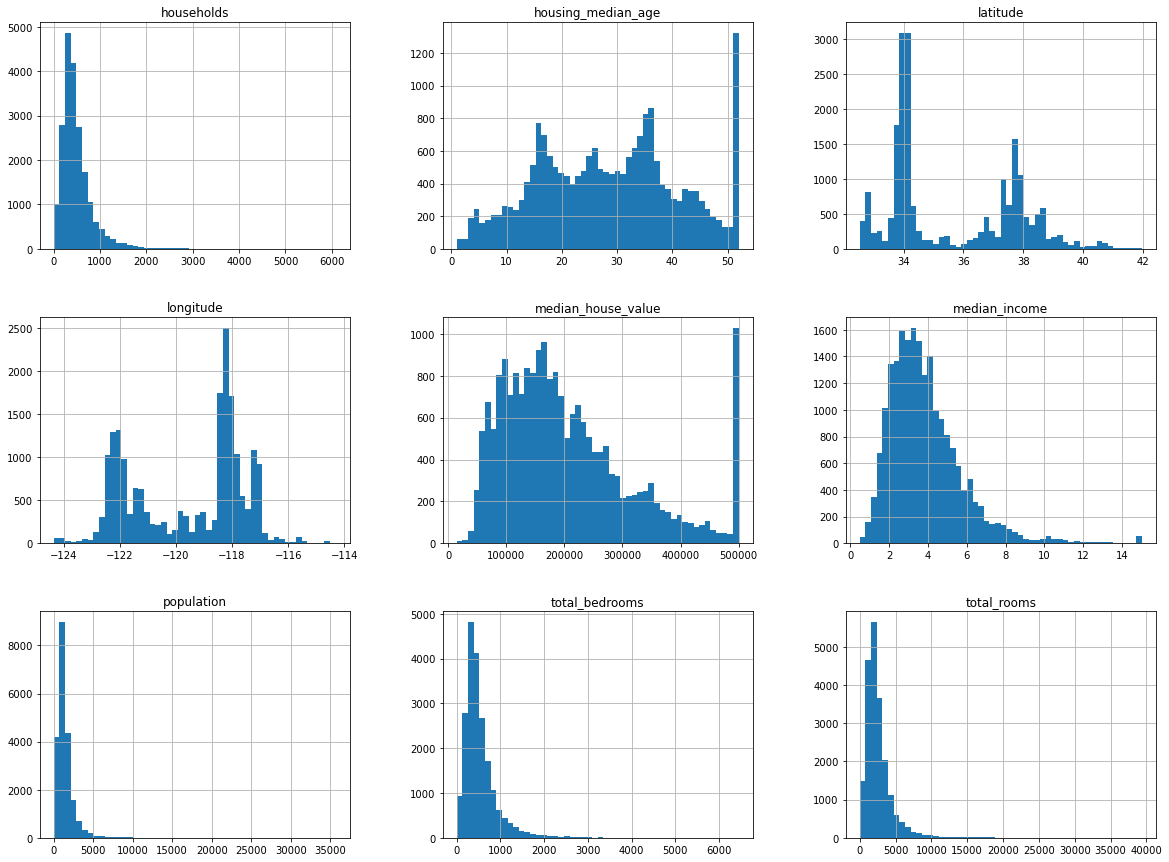

In [86]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

- median_income은 단위가 달러가 아닌 것으로 보임. 상한 15.0001, 하한 0.4999로 표준화한 데이터로 보임 (상한과 하한은 위의 describe() 결과에서 확인함)
- housing_median_age와 median_house_value도 상한값을 한정했습니다. 위의 히스토그램에서 두 변수의 경우 맨 오른쪽 히스토그램 막대가 유난히 높게 보임. 이는 상한보다 큰 값들은 모두 상한값으로 변경한 것으로 볼 수 있음
- 변수들의 범위가 서로 상이함
- 변수들의 분포가 정규분포를 이루지 않고 한쪽으로 특히 왼쪽으로 치우쳐진 경우가 많음

### 3. 데이터 시각화

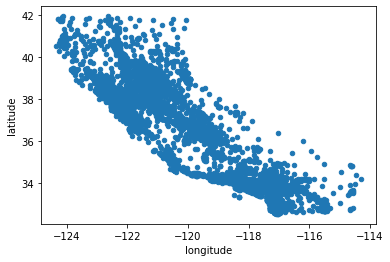

In [87]:
housing.plot(kind='scatter', x='longitude', y='latitude')

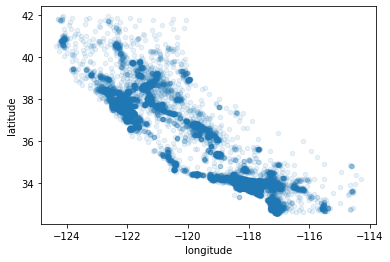

In [88]:
# 데이터가 밀집된 영역을 파악하기 위해 투명도를 높임.
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

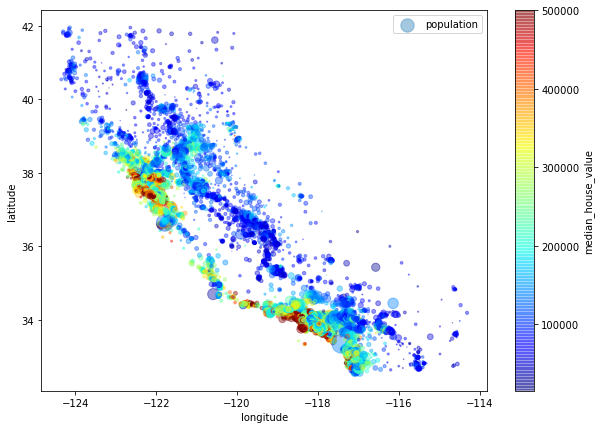

In [89]:
# 다양한 색깔과 크기로 데이터를 좀더 시각화해 보자.
# s 원 크기, c 색깔, cmap의 jet 옵션은 낮은 값은 파란색으로 높은 값은 빨간색으로 표시

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
    s=housing['population']/100, label='population', figsize=(10,7),
    c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False
)
plt.legend()

- 인구밀도가 높은 곳이 주택 가격이 높아 보임
- 바다에 인접한 지역이 그렇지 않은 지역에 비해 주택 가격이 높아 보임
- 시각화를 찾아낸 이런 경향을 군집화나 모형을 만들때 입력 변수 선정에 활용됨

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F39C0E8FC8>,
      dtype=object)

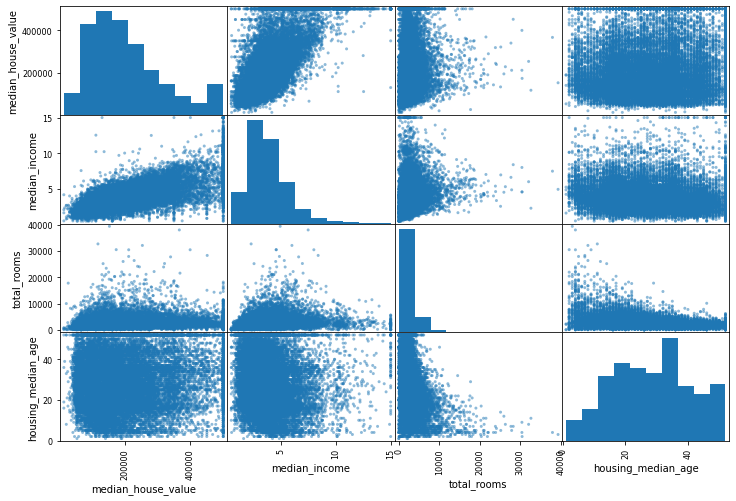

In [90]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

### 4. 머신 러닝 알고리즘을 위한 데이터 준비

- NA 제거 및 종속변수와 독립변수 구분 

In [91]:
housing = housing.dropna()
housing_input = housing.drop('median_house_value', axis=1)
housing_labels = housing['median_house_value']

- 표준화
- 숫자형 변수들의 범위가 다양하므로 모두 비슷한 범위로 표준화함. ocean_proximity를 제외한 숫자형 변수들만 표준화를 수행해 보자.

In [92]:
from sklearn.preprocessing import StandardScaler

housing_num = housing_input.drop(['ocean_proximity'], axis=1)

scaler = StandardScaler()
housing_num = pd.DataFrame(scaler.fit_transform(housing_num))
housing_num.columns = [['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
housing_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04
mean,-3.337466e-15,6.980827e-16,-7.584704e-16,2.192776e-16,2.035816e-16,-2.316367e-16,1.299940e-16,3.832505e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.385447e+00,-1.447937e+00,-2.194584e+00,-1.205604e+00,-1.274093e+00,-1.254828e+00,-1.303810e+00,-1.775054e+00
25%,-1.112692e+00,-7.972780e-01,-8.444662e-01,-5.429688e-01,-5.740034e-01,-5.629702e-01,-5.739976e-01,-6.884113e-01
50%,5.393926e-01,-6.428050e-01,2.913923e-02,-2.331597e-01,-2.441308e-01,-2.285134e-01,-2.365573e-01,-1.762077e-01
75%,7.789699e-01,9.768213e-01,6.644886e-01,2.317829e-01,2.589843e-01,2.621409e-01,2.735268e-01,4.595713e-01
max,2.625711e+00,2.956885e+00,1.855769e+00,1.678713e+01,1.401871e+01,3.023088e+01,1.460297e+01,5.859665e+00


- 학습집합, 테스트집합 나누기

In [93]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_labels, test_labels = train_test_split(housing_num, housing_labels, test_size=0.2)

### 5. 모델 선택과 학습¶

- Lasso는 가중치를 0으로 만들기에 자동 변수 선택과 같은 역할을 수행하기도 함

In [94]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1)
lasso_reg.fit(train_input,train_labels)

Lasso(alpha=1)

In [95]:
from regressors import stats 

stats.summary(lasso_reg, train_input, train_labels)

Residuals:
        Min          1Q      Median          3Q          Max
-785659.815 -30006.6082  11162.0016  43355.6092  561662.9556


Coefficients:
                 Estimate   Std. Error   t value  p value
_intercept  206552.208081   541.077215  381.7426      0.0
x1          -85391.855570  1287.775546  -66.3096      0.0
x2          -90317.813191  1297.986513  -69.5830      0.0
x3           14445.314722   587.008789   24.6083      0.0
x4          -17865.283851  1674.270542  -10.6705      0.0
x5           47182.817303  2644.367222   17.8428      0.0
x6          -42848.607446  1189.434751  -36.0243      0.0
x7           18463.357082  2628.430088    7.0245      0.0
x8           76336.794106   606.015676  125.9650      0.0
---
R-squared:  0.63678,    Adjusted R-squared:  0.63660
F-statistic: 3580.16 on 8 features


- 모든 변수가 유의함. 다중 회귀분석과 같이 다중공선성 문제를 점검할 수도 있으나 여기서는 그냥 진행함
- 그리드 탐색 수행

In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'alpha': [1e-10, 1e-4, 1e-2, 0.1, 0.3, 0.5, 0.7, 0.9, 1, 5, 10, 20]}
]

lasso_reg = Lasso()

grid_search = GridSearchCV(
    lasso_reg, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    return_train_score=True)

grid_search.fit(train_input, train_labels)

C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91628048013.30469, tolerance: 17268076988.925602
  positive)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418722855131.6406, tolerance: 17357278288.88042
  positive)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [1e-10, 0.0001, 0.01, 0.1, 0.3, 0.5, 0.7,
                                    0.9, 1, 5, 10, 20]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [97]:
grid_search.best_params_

{'alpha': 20}

In [98]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

69290.52786955047 {'alpha': 1e-10}
69290.527866536 {'alpha': 0.0001}
69290.52756725451 {'alpha': 0.01}
69290.52485497852 {'alpha': 0.1}
69290.51888152189 {'alpha': 0.3}
69290.51294102232 {'alpha': 0.5}
69290.50707009988 {'alpha': 0.7}
69290.50119967015 {'alpha': 0.9}
69290.49839344971 {'alpha': 1}
69290.39145122675 {'alpha': 5}
69290.28182847163 {'alpha': 10}
69290.14315501973 {'alpha': 20}


In [99]:
lasso_reg = Lasso(alpha=20)
lasso_reg.fit(train_input,train_labels)

Lasso(alpha=20)

In [100]:
y_lasso = lasso_reg.predict(test_input)

- Ridge

In [109]:
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

param_dist = {'alpha': loguniform(1e-4, 1e4)}

ridge_reg = Ridge()

n_iter_search = 50
random_search = RandomizedSearchCV(ridge_reg, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring='neg_mean_squared_error',
                                   return_train_score=True
                                  )

random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Ridge(), n_iter=50,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F39B5D5388>},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [110]:
random_search.best_params_

{'alpha': 28.8470326199141}

In [111]:
ridge_reg = Ridge(alpha=random_search.best_params_['alpha'])
ridge_reg.fit(train_input,train_labels)
y_ridge = ridge_reg.predict(test_input)

- Elastic Net

In [104]:
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.linear_model import ElasticNet

param_dist = {'l1_ratio': stats.uniform(0, 1),
              'alpha': loguniform(1e-4, 20)}

elastic_net = ElasticNet()

n_iter_search = 50
random_search = RandomizedSearchCV(elastic_net, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring='neg_mean_squared_error',
                                   return_train_score=True
                                  )

random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=ElasticNet(), n_iter=50,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F39B393F88>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F39B393588>},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [105]:
random_search.best_params_

{'alpha': 0.022598995798579668, 'l1_ratio': 0.008248343639344902}

In [106]:
elastic_net = ElasticNet(alpha=random_search.best_params_['alpha'],l1_ratio=random_search.best_params_['l1_ratio'])
elastic_net.fit(train_input,train_labels)
y_elastic = elastic_net.predict(test_input)

In [112]:
from sklearn.metrics import mean_squared_error
import math

rmse_ridge = math.sqrt(mean_squared_error(y_ridge, test_labels))
rmse_lasso = math.sqrt(mean_squared_error(y_lasso, test_labels))
rmse_elastic = math.sqrt(mean_squared_error(y_elastic, test_labels))

In [113]:
print('Ridge : ', rmse_ridge)
print('Lasso : ', rmse_lasso)
print('ElasticNet : ', rmse_elastic)

Ridge :  71099.57812088028
Lasso :  71080.49791752355
ElasticNet :  71780.29448756442
